# Moran 指数-四种权重函数示意图-B723

## 背景

推文中提及了如下内容，但没有给出四种权重函数的示意图。我写了一个提示词，用于编写 Python 代码，绘制四种权重函数的示意图。


**四种构建方式**：
1. **幂函数型**（Power）：
   
$$
w_{ij}=\frac{d_{ij}^{-\delta}}{\sum_{k=1,\,k\neq i}^{n} d_{ik}^{-\delta}},\quad \delta>0\quad\text{且 }w_{ii}=0
$$  

其中，分子 $d_{ij}$ 表示区域 $i$ 和区域 $j$ 之间的距离；参数 $\delta>0$ 用于控制距离衰减速度；分母为各个区域与 $i$ 的距离的幂函数之和，作用在于确保权重 $w_{ij}$ 的和为 1。

2. **指数型**（Exponential）：
   $$ w_{ij} = \frac{\exp(-\delta d_{ij})}{\sum \exp(-\delta d_{ij})} $$
3. **二元邻接型**（Binary）：
   $$ w_{ij} = \frac{I(d_{ij}<d)}{\sum I(d_{ij}<d)} $$
4. **k近邻型**（k-NN）：
   $$ w_{ij} = \frac{I(d_{ij}\leq d_{ij,(k)})}{\sum I(d_{ij}\leq d_{ij,(k)})} $$


## 提示词 


```md
帮我编写 Python 代码，绘制一幅图形，2*2 布局，展示上述四种函数的特征。
- path-filename：'./figures/B723_Moran_four_Weight_functions.png'
- 纵轴：w
- 横轴：d, 取值范围你酌情确定
- 参数取值：$\delta = 0.2$
- 四幅图的纵坐标范围尽可能保持一致，以增强图形之间的可比性。纵轴刻度从 -0.05 开始。
- 支持中文字符，不依赖于电脑字体，使用通用中文字体即可，可以按需加载必要的 packages。
- 忽略所有 warning 信息
- 子图 
  - 子图标题：幂函数型、指数型、二元邻接型、k 近邻型；字号 12pt
  - 子图 legend：仅列出函数形式即可，如 label=f'$w=d^{{-{delta}}}$'
- 坐标刻度的字号不小于 11pt
- 函数形式可以简化：
  - 幂函数型：$w = d^{-\delta}$
  - 指数型：$w = \exp(-\delta d)$
  - 二元邻接型：$w = I(d<\#)$，其中 # 是某个距离阈值，酌情设定
  - k 近邻型：$w = I(d<d_{(\#)})$，其中 $d_{(3)}$ 是距离的第 # 小值 
    - 这个函数我不确定如何表示比较合适？你酌情处理，最好能符合文献的规范
- 完成图形绘制后，保存到指定路径，图形尺寸：宽度 = 700像素
- 展示图形
```


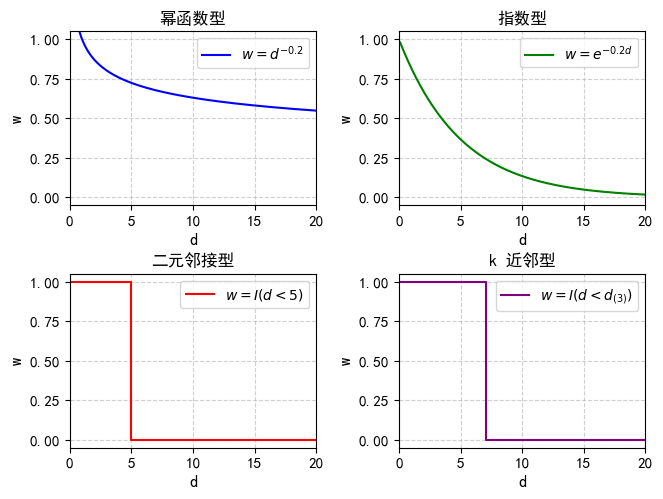

图形已保存至: ./figures/B723_Moran_four_Weight_functions.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 导入字体管理器
import os # 用于创建文件夹

# 忽略所有 warning 信息
import warnings
warnings.filterwarnings("ignore")

# 加载中文字体 - 尝试使用系统通用字体
# 推荐使用这种方式，因为它会按顺序尝试列出的字体，直到找到一个可用的。
# 如果所有列出的字体都不存在，matplotlib会回退到默认字体，并可能发出警告。
# 为了最大程度避免警告，可以确保第一个字体是系统中常用且存在的。
# 对于Linux/macOS，'WenQuanYi Zen Hei' 或 'Arial Unicode MS' 是不错的选择
# 对于Windows，'SimHei' 通常是存在的
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'WenQuanYi Zen Hei', 'DejaVu Sans'] 
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 定义参数
delta = 0.2
d_binary_threshold = 5  # 二元邻接型阈值
d_k_nn_threshold = 7    # k近邻型阈值 (为了区分，设定一个不同的阈值，模拟“第k个距离”的概念)

# 距离范围
d = np.linspace(0.1, 20, 500) # 从0.1开始避免除以0的情况

# 定义权重函数 (简化形式)
def power_weight(d, delta):
    # 更安全的写法，虽然对于d=0.1已经足够
    # 也可以在d非常接近0时设置一个非常大的值或0，取决于具体应用
    return d**(-delta)

def exponential_weight(d, delta):
    return np.exp(-delta * d)

def binary_weight(d, threshold):
    return np.where(d < threshold, 1, 0) # I(d < threshold)

def k_nn_weight(d, threshold):
    # 这里我们简化为 I(d < threshold)，模拟 k 近邻的截断特性
    # 在实际应用中，k-NN的阈值d_(k)是数据驱动的
    # 为了展示函数特征，我们设定一个具体的阈值。
    return np.where(d < threshold, 1, 0)

# 创建 2x2 子图
fig, axes = plt.subplots(2, 2, figsize=(7, 7/1.33)) # 700 pixels wide, adjust height for aspect ratio

# 调整图之间的间距
plt.tight_layout(pad=3.0)

# 设置横轴和纵轴的标签和范围
common_w_max = 1.05 # 统一纵坐标范围的最大值
common_w_min = -0.05 # 统一纵坐标范围的最小值 (根据上次修改要求)
common_d_max = d.max()

# 1. 幂函数型
ax1 = axes[0, 0]
w_power = power_weight(d, delta)
ax1.plot(d, w_power, label=f'$w=d^{{-{delta}}}$', color='blue')
ax1.set_title('幂函数型', fontsize=12)
ax1.set_xlabel('d', fontsize=12)
ax1.set_ylabel('w', fontsize=12)
ax1.set_ylim(common_w_min, common_w_max)
ax1.set_xlim(0, common_d_max)
ax1.tick_params(axis='both', which='major', labelsize=11)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(fontsize=10)

# 2. 指数型
ax2 = axes[0, 1]
w_exponential = exponential_weight(d, delta)
ax2.plot(d, w_exponential, label=f'$w=e^{{-{delta}d}}$', color='green')
ax2.set_title('指数型', fontsize=12)
ax2.set_xlabel('d', fontsize=12)
ax2.set_ylabel('w', fontsize=12)
ax2.set_ylim(common_w_min, common_w_max)
ax2.set_xlim(0, common_d_max)
ax2.tick_params(axis='both', which='major', labelsize=11)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(fontsize=10)

# 3. 二元邻接型
ax3 = axes[1, 0]
w_binary = binary_weight(d, d_binary_threshold)
ax3.plot(d, w_binary, label=f'$w=I(d<{d_binary_threshold})$', color='red', drawstyle='steps-post')
ax3.set_title('二元邻接型', fontsize=12)
ax3.set_xlabel('d', fontsize=12)
ax3.set_ylabel('w', fontsize=12)
ax3.set_ylim(common_w_min, common_w_max)
ax3.set_xlim(0, common_d_max)
ax3.tick_params(axis='both', which='major', labelsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.legend(fontsize=10)

# 4. k 近邻型
ax4 = axes[1, 1]
w_k_nn = k_nn_weight(d, d_k_nn_threshold)
# 修正 k 近邻型的 legend，使其更符合 k-NN 的常规表示 d_(k)
# 例如，如果 d_k_nn_threshold=7，我们可能希望它表示第 k=3 个或 k=5 个邻居
# 这里假设 d_k_nn_threshold 对应于某个 k 值，例如 k = d_k_nn_threshold - X
# 我们可以简单使用一个固定k值，如 k=3 或 k=5 来表示
k_value_for_legend = 3 # 假设这里模拟第3近邻
ax4.plot(d, w_k_nn, label=f'$w=I(d<d_{{({k_value_for_legend})}})$', color='purple', drawstyle='steps-post')
ax4.set_title('k 近邻型', fontsize=12)
ax4.set_xlabel('d', fontsize=12)
ax4.set_ylabel('w', fontsize=12)
ax4.set_ylim(common_w_min, common_w_max)
ax4.set_xlim(0, common_d_max)
ax4.tick_params(axis='both', which='major', labelsize=11)
ax4.grid(True, linestyle='--', alpha=0.6)
ax4.legend(fontsize=10)

# 保存图形
output_filename = './figures/B723_Moran_four_Weight_functions.png'
# 确保目录存在
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
plt.savefig(output_filename, dpi=300, bbox_inches='tight') # dpi=300 保证清晰度

# 显示图形
plt.show()

print(f"图形已保存至: {output_filename}")